<a href="https://colab.research.google.com/github/Harshh7Singh/BOOK-Recommendation/blob/main/BOOKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler


In [5]:
df = pd.read_csv('books.csv', on_bad_lines='skip')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


/tmp/ipython-input-1775097275.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_rating", y="title", data=data, palette='inferno')


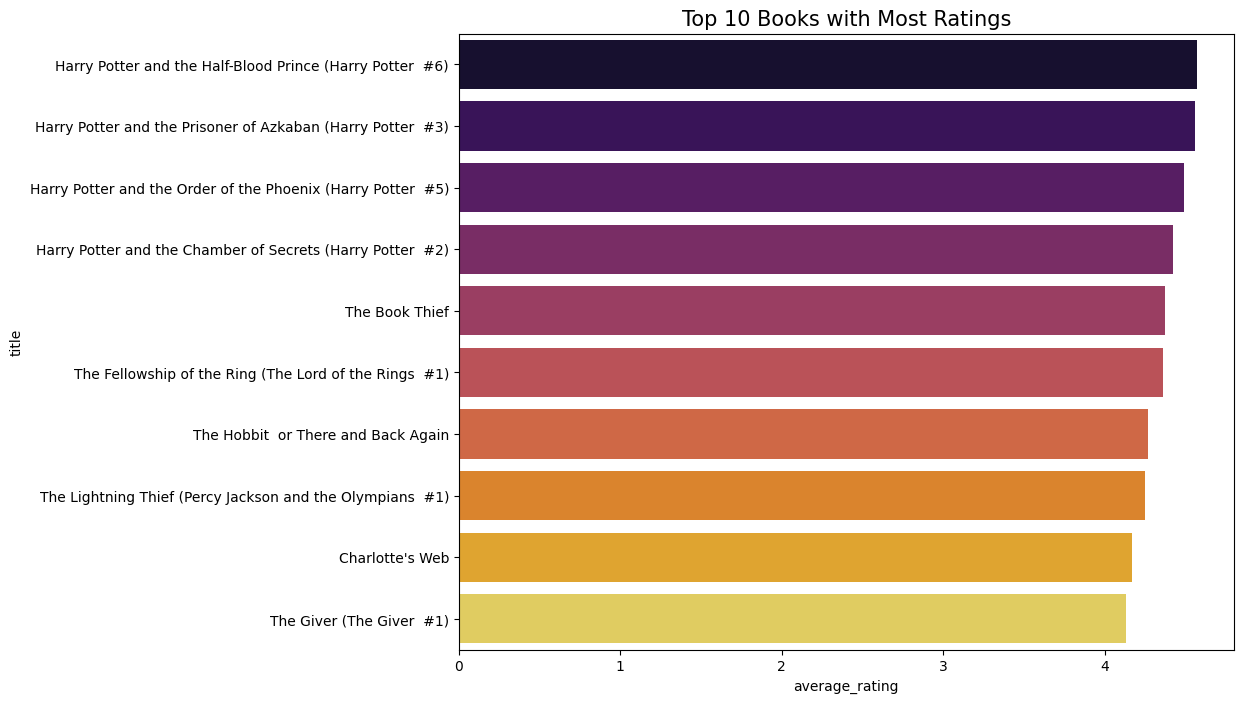

In [6]:
top_ten = df[df['ratings_count'] > 1000000]
data = top_ten.sort_values(by='average_rating', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x="average_rating", y="title", data=data, palette='inferno')
plt.title("Top 10 Books with Most Ratings", fontsize=15)
plt.show()


/tmp/ipython-input-459244889.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="title", y="authors", data=most_books, palette='viridis')


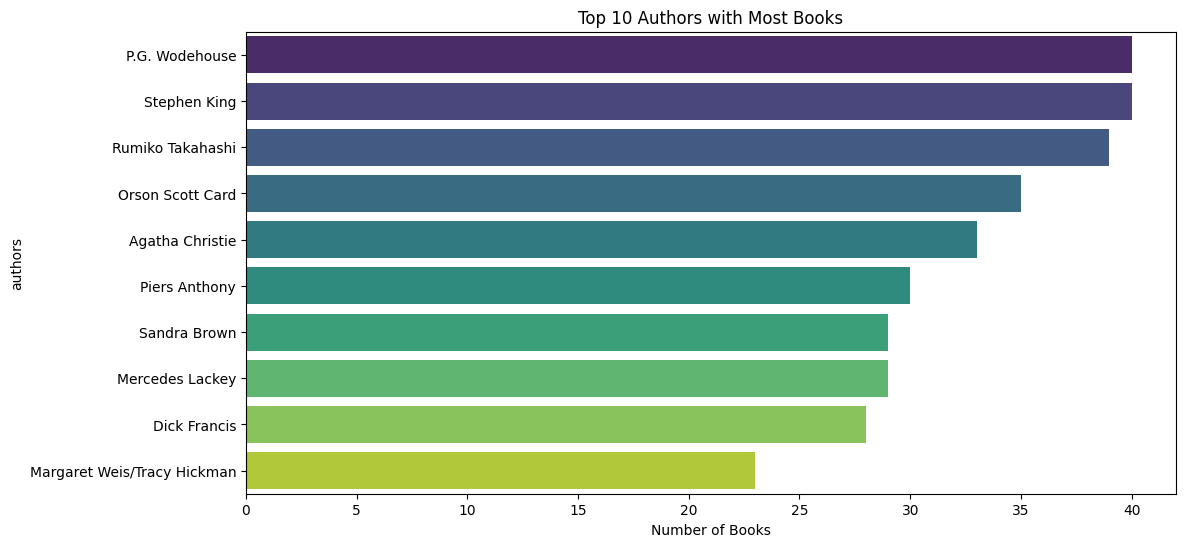

In [7]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x="title", y="authors", data=most_books, palette='viridis')
plt.title("Top 10 Authors with Most Books")
plt.xlabel("Number of Books")
plt.show()


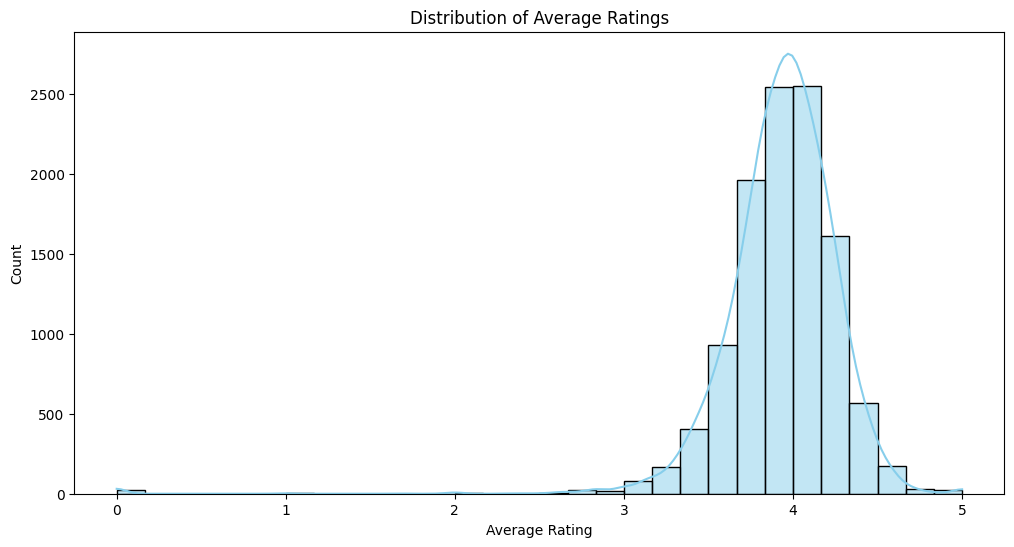

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(df['average_rating'].astype(float), bins=30, kde=True, color="skyblue")
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.show()


In [9]:
features = df[['average_rating', 'ratings_count', '  num_pages']].fillna(0)

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


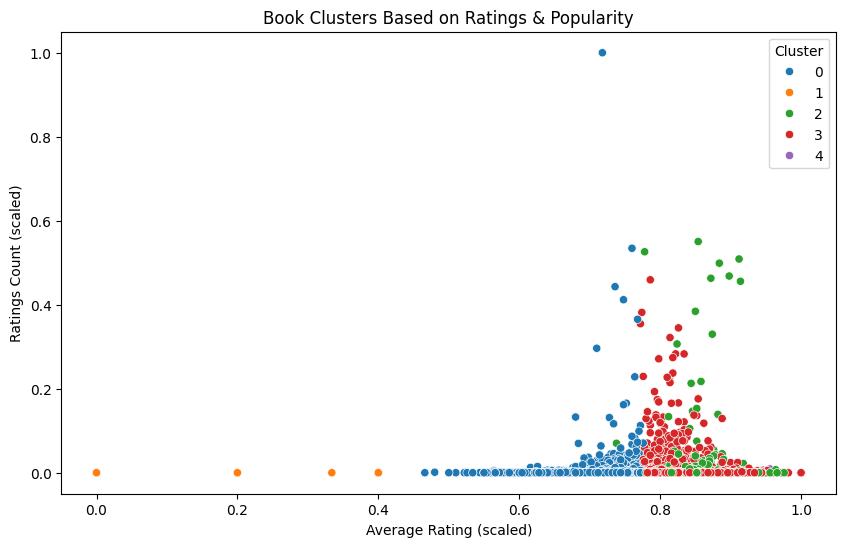

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=df['Cluster'], palette='tab10')
plt.title("Book Clusters Based on Ratings & Popularity")
plt.xlabel("Average Rating (scaled)")
plt.ylabel("Ratings Count (scaled)")
plt.show()


In [11]:
knn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
knn.fit(features_scaled)

def recommend_book(book_title):
    if book_title not in df['title'].values:
        return f"❌ Book '{book_title}' not found in dataset."

    idx = df[df['title'] == book_title].index[0]
    distances, indices = knn.kneighbors([features_scaled[idx]])

    recommendations = df.iloc[indices[0][1:]][['title', 'authors', 'average_rating']]
    return recommendations

# Example
print(recommend_book("The Hunger Games"))


❌ Book 'The Hunger Games' not found in dataset.


In [12]:
import joblib

joblib.dump(knn, "book_recommender_knn.joblib")
joblib.dump(scaler, "scaler.joblib")
df.to_csv("books_processed.csv", index=False)


In [13]:
import gradio as gr

def gradio_recommend(book_title):
    if book_title not in df['title'].values:
        return "Book not found!"
    return recommend_book(book_title).to_string(index=False)

iface = gr.Interface(fn=gradio_recommend,
                     inputs="text",
                     outputs="text",
                     title="📚 Book Recommendation System",
                     description="Enter a book title to get similar book recommendations.")
iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://441f4cbe87b16baba8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
